### №1 Section for importing libraries and reading data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

colors = ['b', 'g', 'r']
markers = ['s', '*', 'o']
work_dir_path = os.path.join(os.getcwd(), 'bin_data')
spectra_path = os.path.join(work_dir_path, 'data.npy')
labels_path = os.path.join(work_dir_path, 'labels.npy')
spectra = np.load(spectra_path)
labels = np.load(labels_path)

### №2 Section for visualizing input data

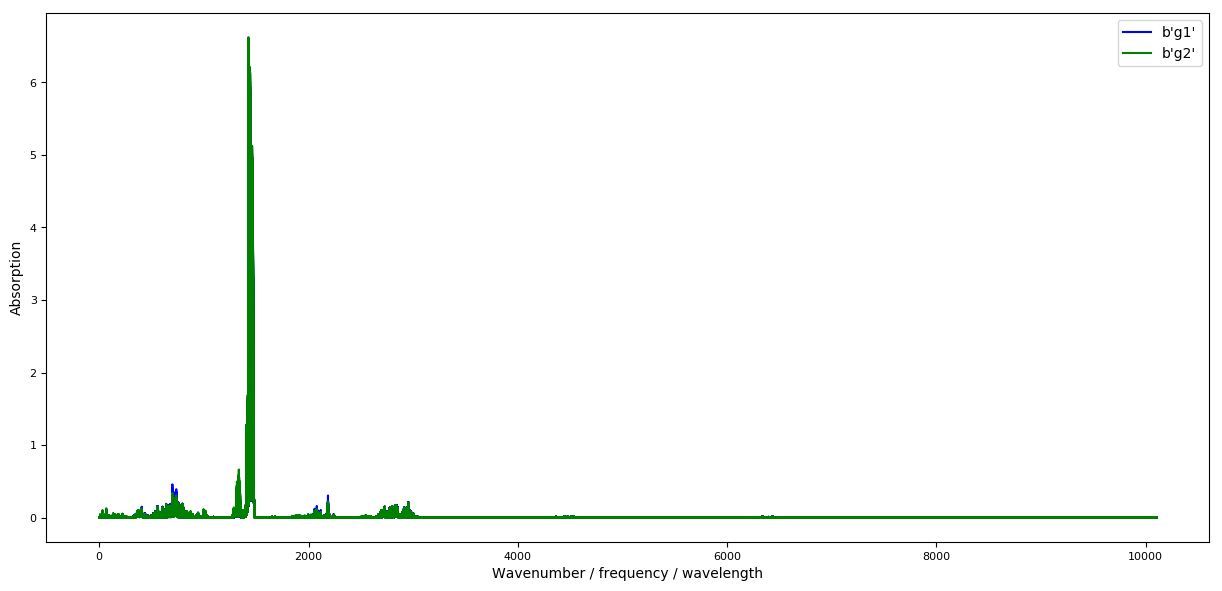

In [22]:
def plot_spectra(spectra, labels):
    unique_labels = np.unique(labels)

    fig = plt.figure(figsize=(15, 7), dpi=100)
    plt.ylabel('Absorption', fontsize=10)
    plt.xlabel('Wavenumber / frequency / wavelength', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    c = 1
    for label in unique_labels:
        label_indices = (labels[:] == label)
        label_spectra = spectra[label_indices]
        
        for spectrum in label_spectra:
            plt.plot(range(0, len(spectrum)), spectrum, color=colors[len(colors) % c], label=label)
        c += 1

    legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
    handle_by_label = dict(zip(legend_labels, legend_handles))
    plt.legend(handle_by_label.values(), handle_by_label.keys()) 
    plt.show()

    return

plot_spectra(spectra, labels)

### №3 Section for Feature Selection based on Isolation Forest algorithm

In [13]:
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=True, n_jobs=-1, random_state=42, verbose=0).fit(spectra)
pred = clf.predict(spectra)

outliers=np.unique(pred, return_counts = True)
print(outliers[1][0])

12
